### Starter Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

### Data harmonization

In [7]:
batch1 = pd.read_csv('/content/drive/My Drive/files_batches/Batch1.csv')
batch2 = pd.read_csv('/content/drive/My Drive/files_batches/Batch2.csv')
batch3 = pd.read_csv('/content/drive/My Drive/files_batches/Batch3.csv')
batch4 = pd.read_csv('/content/drive/My Drive/files_batches/Batch4.csv')
batch5 = pd.read_csv('/content/drive/My Drive/files_batches/Batch5.csv')
batch6 = pd.read_csv('/content/drive/My Drive/files_batches/Batch6.csv')
batch7 = pd.read_csv('/content/drive/My Drive/files_batches/Batch7.csv')
batch8 = pd.read_csv('/content/drive/My Drive/files_batches/Batch8.csv')
batch9 = pd.read_csv('/content/drive/My Drive/files_batches/Batch9.csv')

# concat them
batches = pd.concat([batch1, batch2, batch3, batch4, batch5, batch6, batch7, batch8, batch9])

In [8]:
# timeframe filter
batches.time = pd.to_datetime(batches.time)
after_start_date = batches["time"] >= '2019-12-01'
before_end_date = batches["time"] <= '2020-10-06'

between_two_dates = after_start_date & before_end_date
batches1 = batches.loc[between_two_dates]


print(batches1.shape)
batches1.head(3)

(3358933, 17)


Unnamed: 0  ...                                    hashtag
0           0  ...  ['IllegalDeforestation', 'ClimateChange']
5           5  ...  ['IllegalDeforestation', 'ClimateChange']
10         10  ...  ['IllegalDeforestation', 'ClimateChange']

[3 rows x 17 columns]

In [9]:
print(batches1.shape)

# remove the tweets with the following hashtags to get more specific tweets
test_list  = ['climatechange', 'natureishealing', 'environment', 'ventilation', 'nature']
indices = batches1.id.to_list()
tags = batches1.hashtag.to_list()

the_suckers = []
for list_of_tags, index in zip(tags, indices):
    check =  any(item in list_of_tags for item in test_list)
    if check is True:
        the_suckers.append(index)

batches2 = batches1.loc[~batches1.id.isin(the_suckers)]
print(batches2.shape)

(3358933, 17)
(1046425, 17)


In [10]:
# a = pd.DataFrame(no_rt.text.sample(10))
# a.columns = ['tweet']
# a

In [11]:
# more files
f = pd.read_csv('/content/drive/My Drive/files_batches/f.csv')
g = pd.read_csv('/content/drive/My Drive/files_batches/g.csv')
h = pd.read_csv('/content/drive/My Drive/files_batches/h.csv')
i = pd.read_csv('/content/drive/My Drive/files_batches/i.csv')
j = pd.read_csv('/content/drive/My Drive/files_batches/j.csv')
k = pd.read_csv('/content/drive/My Drive/files_batches/k.csv')
l = pd.read_csv('/content/drive/My Drive/files_batches/l.csv')
m = pd.read_csv('/content/drive/My Drive/files_batches/m.csv')
o = pd.read_csv('/content/drive/My Drive/files_batches/o.csv')
p = pd.read_csv('/content/drive/My Drive/files_batches/p.csv')

# concating
letters = pd.concat([f, g, h, i, j, k, m, o, p])

In [12]:
# time filter
letters.time = pd.to_datetime(letters.time)
after_start_date = letters["time"] >= '2019-12-01'
before_end_date = letters["time"] <= '2020-10-06'

between_two_dates = after_start_date & before_end_date
letters1 = letters.loc[between_two_dates]

print(letters1.shape)

(1414, 17)


In [13]:
data2 = pd.concat([letters1, batches2])
data2.shape

(1047839, 17)

In [14]:
# grand/final data to work with
print(data2.shape)
data2 = data2.drop_duplicates(subset ="id")
print(data2.shape)
data2.to_csv('reduced2.csv')

(1047839, 17)
(3938, 17)


In [15]:
data2.text.head(7)

0    Wow that should go a long way towards @UrbanBe...
1    RT @UrbanBetter: Join the #Blueskychallenge 👇🏿...
2    RT @EngageAfricaFdt: #TGIM Who is planning to ...
3    RT @UrbanBetter: Check out #blueskychallenge 👇...
4    RT @UrbanBetter: Happy #WorldCleanAirDay\n\nWe...
5    RT @UrbanBetter: 7,6,5,4,3 DAYS ‘til #BlueSkyC...
6    RT @DrTolullah: Not long to go!!!  @GlobalYAca...
Name: text, dtype: object

In [16]:
# checking for retweets 
print(data2.shape)

indices = data2.id.to_list()
tweets = data2.text.to_list()

the_rts= []
for tweet, index in zip(tweets, indices):
    check =  "RT" in tweet
    if check is True:
        the_rts.append(index)

data4 = data2.loc[~data2.id.isin(the_rts)]
print(data4.shape)

(3938, 17)
(1239, 17)


In [18]:
# a = pd.DataFrame(no_rt['text'].sample(10))
# a.columns = ['tweet']
# a

### Trends
* general trend
* trend of randomly sampled data
* trend in the 3 time frames
* may peak
* september peak
* june peak

* go to country wise and see if the trend extends 
* repeat the above for the country segmentation

In [19]:
# preprocessing 
import re 
# remove the hashtags, mentions and unwanted characters from the tweet texts
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
data2 = clean_text(data2, 'text')

In [20]:
# lemmatization, stopwords and tokenization

import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')

nlp = spacy.load("en_core_web_sm")
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
data2.text = data2.text.apply(furnished)
data2.text.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0    wow go long way towards blueskychallenge effec...
1    join blueskychallenge join dsg turnitaround gl...
2    tgim planning apply blueskychallenge week dont...
3    check blueskychallenge amp share let mobilise ...
4    happy worldcleanairdaywe proud present firstev...
Name: text, dtype: object

#### overall trend

In [21]:
##trend of number of tweets
trend = data2[['text', 'time']]
# trend.created_at = pd.to_datetime(trend.created_at)
trend = trend.groupby('time').agg({'text':'count'})
# trend = trend.set_index('created_at')
print(trend.shape)
trend.head(3)

(3829, 1)


text
time                     
2019-12-01 04:21:18     1
2019-12-01 06:25:34     1
2019-12-01 14:17:30     1

In [22]:
# daily trend
daily_time_data = trend.text.resample('D').sum() 
# weekly trend
weekly_time_data = trend.text.resample('W').sum() 
# monthly trend
monthly_time_data = trend.text.resample('M').sum() 

Tweets volume timeseries plots averaged daily


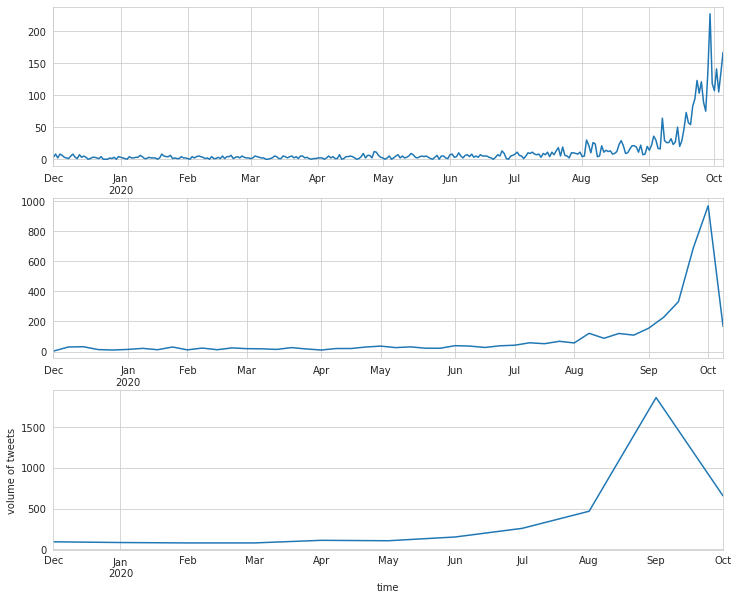

In [23]:
f, axs = plt.subplots(3,figsize=(12,10))
plt.ylabel('volume of tweets')
daily_time_data.plot(ax = axs[0])
weekly_time_data.plot(ax=axs[1])
monthly_time_data.plot(ax=axs[2])
print('Tweets volume timeseries plots averaged daily')

#### retweets impact: trend without retweets 

(1209, 1)
Tweets with no retweets volume timeseries plots averaged daily


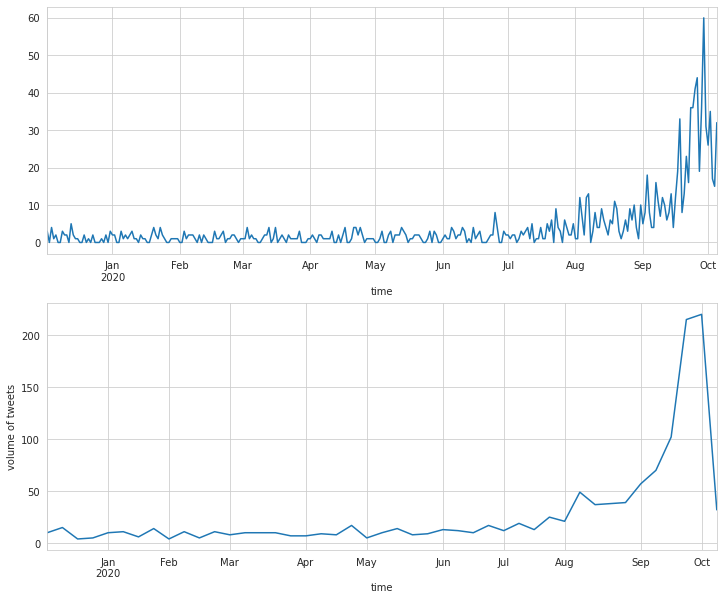

In [24]:
# without retweets
no_rt = data4[['text', 'time']]
no_rt_ = no_rt.groupby('time').agg({'text':'count'})
print(no_rt_.shape)

# daily trend
daily_time_data = no_rt_.text.resample('D').sum() 
# weekly trend
weekly_time_data = no_rt_.text.resample('W').sum() 

f, axs = plt.subplots(2,figsize=(12,10))
plt.ylabel('volume of tweets')
daily_time_data.plot(ax = axs[0])
weekly_time_data.plot(ax=axs[1])
print('Tweets with no retweets volume timeseries plots averaged daily')

so we dont lose the trend: cool

####  trend caused by retweets

(2642, 1)
Retweets volume timeseries plots averaged daily and weekly


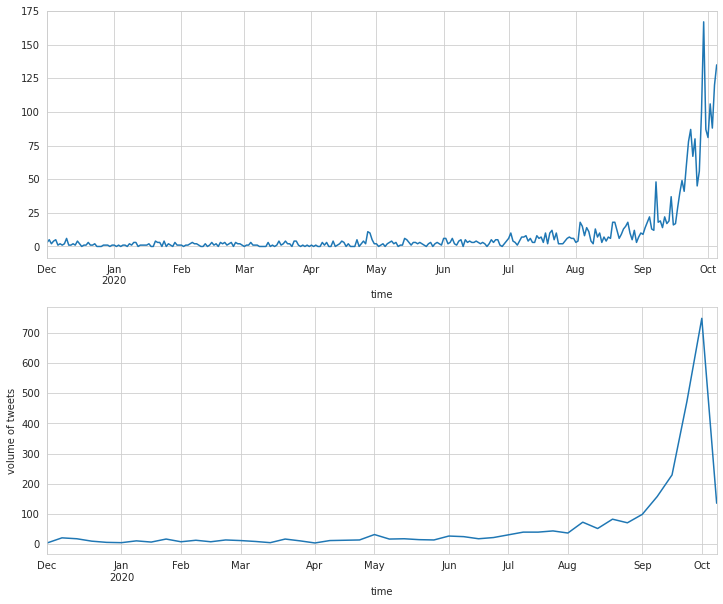

In [25]:
data5 = data2.loc[data2.id.isin(the_rts)]

# without retweets
rt = data5[['text', 'time']]
rt = rt.groupby('time').agg({'text':'count'})
print(rt.shape)

# daily trend
daily_time_data = rt.text.resample('D').sum() 
# weekly trend
weekly_time_data = rt.text.resample('W').sum() 

f, axs = plt.subplots(2,figsize=(12,10))
plt.ylabel('volume of tweets')
daily_time_data.plot(ax = axs[0])
weekly_time_data.plot(ax=axs[1])
print('Retweets volume timeseries plots averaged daily and weekly')

#### randomly sampled data trend

(995, 1)
Randomly sampled Tweets volume timeseries plots averaged daily


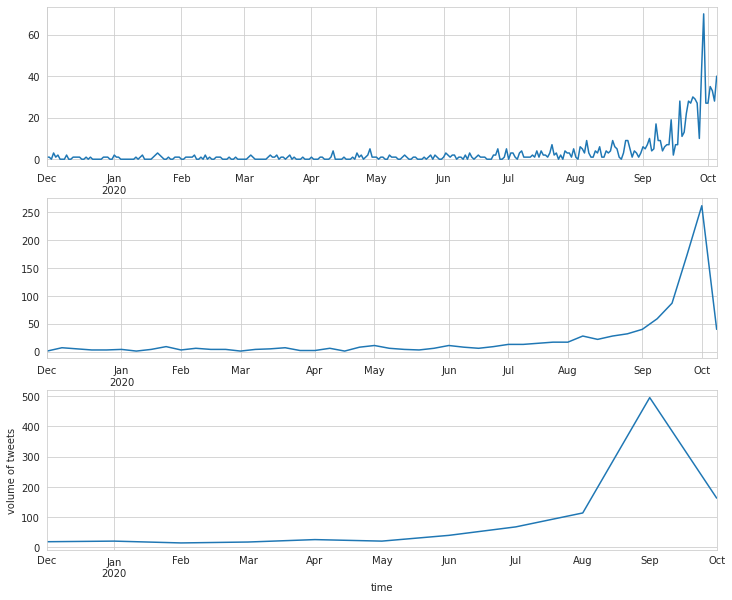

In [26]:
sampled = data2.sample(1000)


trend_s = sampled[['text', 'time']]
trend_s = trend_s.groupby('time').agg({'text':'count'})
# trend = trend.set_index('created_at')
print(trend_s.shape)

# daily trend
daily_time_data_s = trend_s.text.resample('D').sum() 
# weekly trend
weekly_time_data_s = trend_s.text.resample('W').sum() 
# monthly trend
monthly_time_data_s = trend_s.text.resample('M').sum() 

f, axs = plt.subplots(3,figsize=(12,10))
plt.ylabel('volume of tweets')
daily_time_data_s.plot(ax = axs[0])
weekly_time_data_s.plot(ax=axs[1])
monthly_time_data_s.plot(ax=axs[2])
print('Randomly sampled Tweets volume timeseries plots averaged daily')

So the sudden drop in air quality tweets from Dec to January can be explained as follows:
* covid-19 is becoming the new talk, so there's some topical deviation.

A systematic rise from January to February:
*  People are now used to covid and they get ack to tweeting about air quaality.

A drop in April:
* When most lockdown policies were implemented.


#### pre lockdown trend

(331, 1)
Pre lockdown Tweets volume timeseries plots averaged weekly


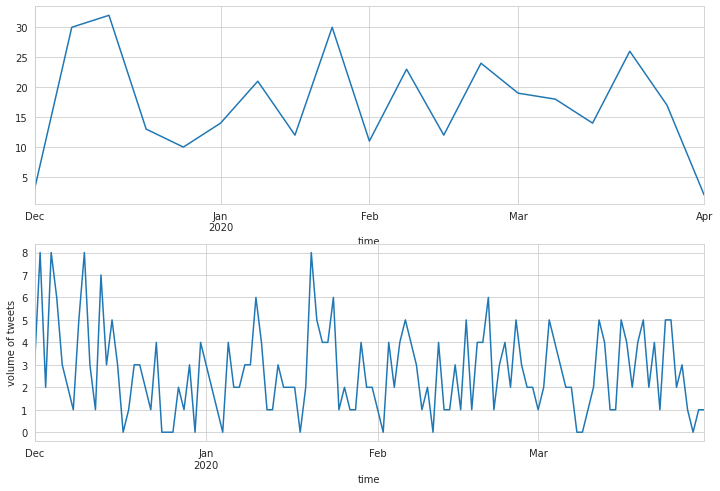

In [27]:
after_start_date = data2["time"] >= '2019-12-01'
before_end_date = data2["time"] <= '2020-04-01'

between_two_dates = after_start_date & before_end_date
pre = data2.loc[between_two_dates]

trend_pre = pre[['text', 'time']]
trend_pre = trend_pre.groupby('time').agg({'text':'count'})
# trend = trend.set_index('created_at')
print(trend_pre.shape)

# daily trend
daily_time_data_pre = trend_pre.text.resample('D').sum() 
# weekly trend
weekly_time_data_pre = trend_pre.text.resample('W').sum() 
# monthly trend
monthly_time_data_pre = trend_pre.text.resample('M').sum() 

f, axs = plt.subplots(2,figsize=(12,8))
plt.ylabel('volume of tweets')
daily_time_data_pre.plot(ax = axs[1])
weekly_time_data_pre.plot(ax=axs[0])
# monthly_time_data_pre.plot(ax=axs[2])
print('Pre lockdown Tweets volume timeseries plots averaged weekly')

Text(0.5, 1.0, 'Most Used Words pre lockdown')

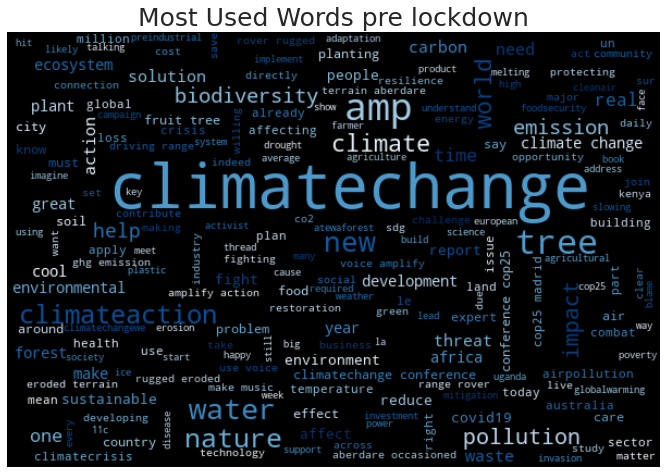

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(pre['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words pre lockdown',fontsize=25)

#### during lockdown trend

(366, 1)
During lockdown Tweets volume timeseries plots averaged daily and weekly


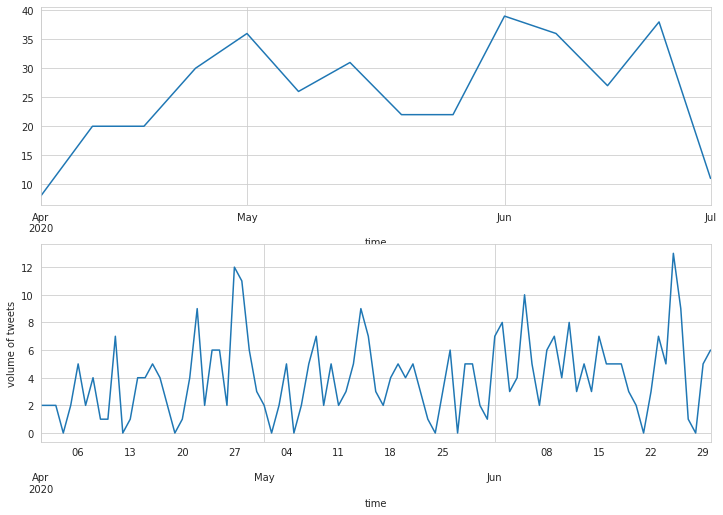

In [29]:
after_start_date = data2["time"] >= '2020-04-01'
before_end_date = data2["time"] <= '2020-07-01'

between_two_dates = after_start_date & before_end_date
during = data2.loc[between_two_dates]

during_pre = during[['text', 'time']]
during_pre = during_pre.groupby('time').agg({'text':'count'})
# trend = trend.set_index('created_at')
print(during_pre.shape)

# daily trend
daily_time_data_during = during_pre.text.resample('D').sum() 
# weekly trend
weekly_time_data_during = during_pre.text.resample('W').sum() 
# monthly trend
monthly_time_data_during = during_pre.text.resample('M').sum() 

f, axs = plt.subplots(2,figsize=(12,8))
plt.ylabel('volume of tweets')
daily_time_data_during.plot(ax = axs[1])
weekly_time_data_during.plot(ax=axs[0])
# monthly_time_data_during.plot(ax=axs[2])
print('During lockdown Tweets volume timeseries plots averaged daily and weekly')

In [30]:
# during.dtypes
# during_pre['text'] = during_pre['text']

Text(0.5, 1.0, 'Most Used Words during lockdown')

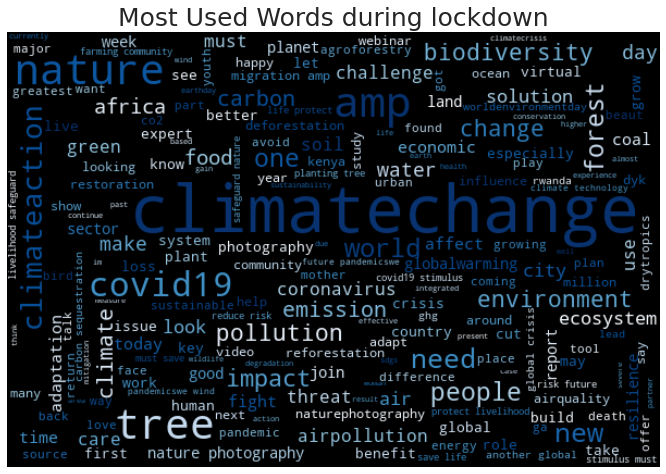

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(during['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words during lockdown',fontsize=25)

#### post lockdown trend

(3132, 1)
Post lockdown Tweets volume timeseries plots averaged weekly


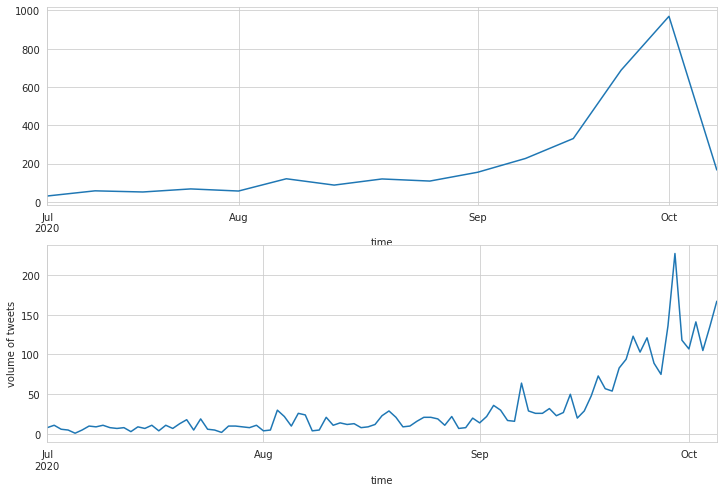

In [32]:
after_start_date = data2["time"] >= '2020-07-01'
before_end_date = data2["time"] <= '2020-10-08'

between_two_dates = after_start_date & before_end_date
post = data2.loc[between_two_dates]

post_lock = post[['text', 'time']]
post_lock = post_lock.groupby('time').agg({'text':'count'})
# trend = trend.set_index('created_at')
print(post_lock.shape)

# daily trend
daily_time_data_post = post_lock.text.resample('D').sum() 
# weekly trend
weekly_time_data_post = post_lock.text.resample('W').sum() 
# monthly trend
monthly_time_data_post = post_lock.text.resample('M').sum() 

f, axs = plt.subplots(2,figsize=(12,8))
plt.ylabel('volume of tweets')
daily_time_data_post.plot(ax = axs[1])
weekly_time_data_post.plot(ax=axs[0])
# monthly_time_data_post.plot(ax=axs[2])
print('Post lockdown Tweets volume timeseries plots averaged weekly')

Text(0.5, 1.0, 'Most Used Words post lockdown')

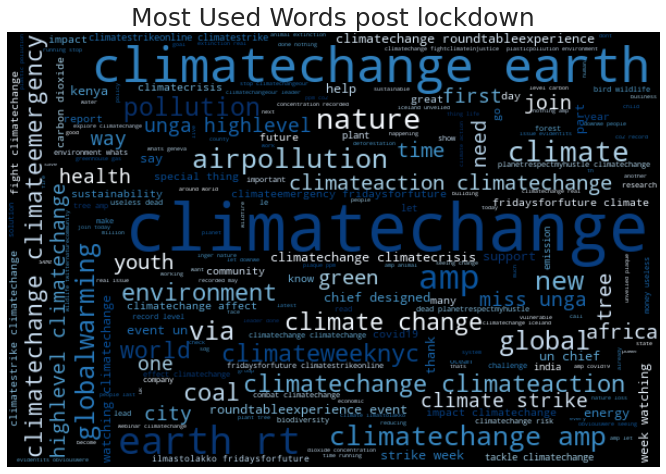

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(post['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words post lockdown',fontsize=25)

#### Tweeps consistency: pre, during and post

Text(0.5, 1.0, 'Most popular tweeps: pre lockdown')

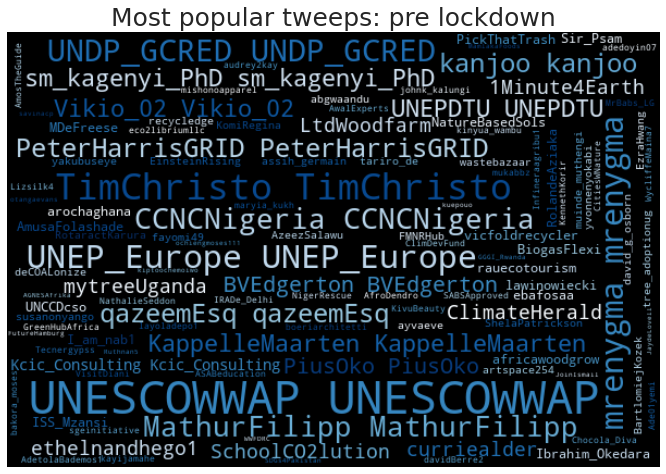

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(pre['screen_name']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most popular tweeps: pre lockdown',fontsize=25)

Text(0.5, 1.0, 'Most popular tweeps during lockdown')

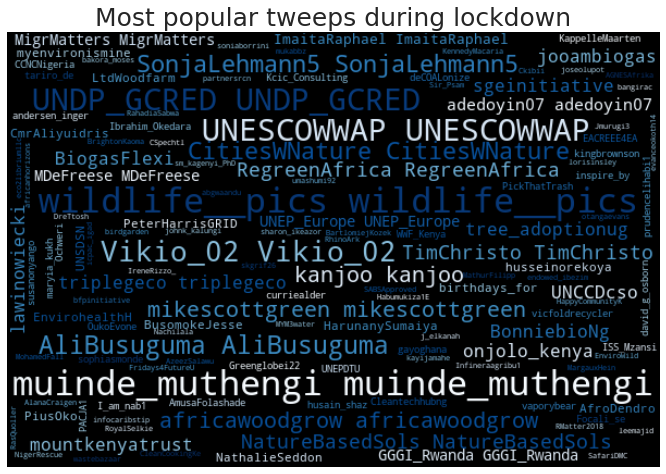

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(during['screen_name']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most popular tweeps during lockdown',fontsize=25)

Text(0.5, 1.0, 'Most popular tweeps: post lockdown')

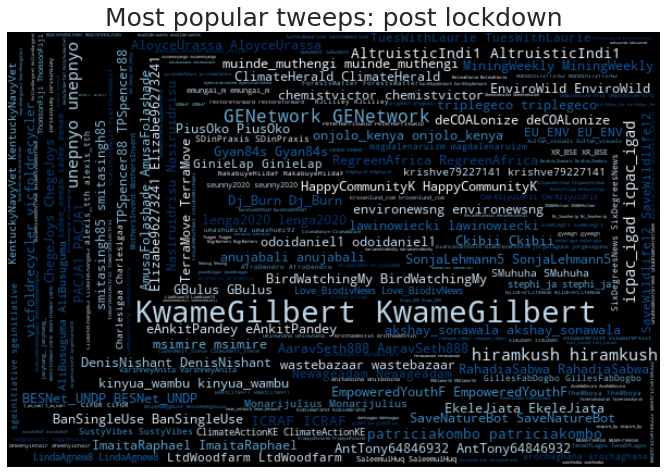

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(post['screen_name']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most popular tweeps: post lockdown',fontsize=25)

Text(0.5, 1.0, 'Distribution of tweeps in the 3 periods')

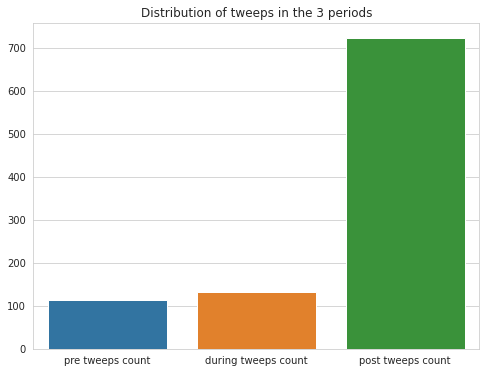

In [37]:
pre_count = pre['screen_name'].nunique()
during_count = during['screen_name'].nunique()
post_count = post['screen_name'].nunique()

labels = ['pre tweeps count', 'during tweeps count', 'post tweeps count']
values = [pre_count, during_count, post_count]
plt.figure(figsize = (8,6))
sns.barplot(x = labels, y = values).set_title('Distribution of tweeps in the 3 periods')

#### the april - may peak

(214, 1)
The April-May peak


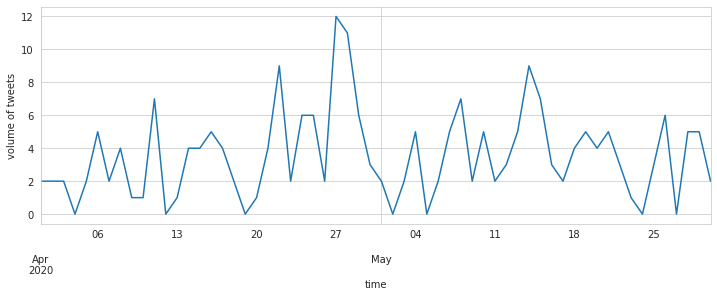

In [38]:
after_start_date = data2["time"] >= '2020-04-01'
before_end_date = data2["time"] <= '2020-05-31'

between_two_dates = after_start_date & before_end_date
april_may = data2.loc[between_two_dates]

april_may_ = april_may[['text', 'time']]
april_may_ = april_may_.groupby('time').agg({'text':'count'})
# trend = trend.set_index('created_at')
print(april_may_.shape)

# daily trend
april_may_daily = april_may_.text.resample('D').sum() 
plt.figure(figsize = (12, 4))
plt.ylabel('volume of tweets')
april_may_daily.plot()
print('The April-May peak')

Text(0.5, 1.0, 'Most Used Words april_may')

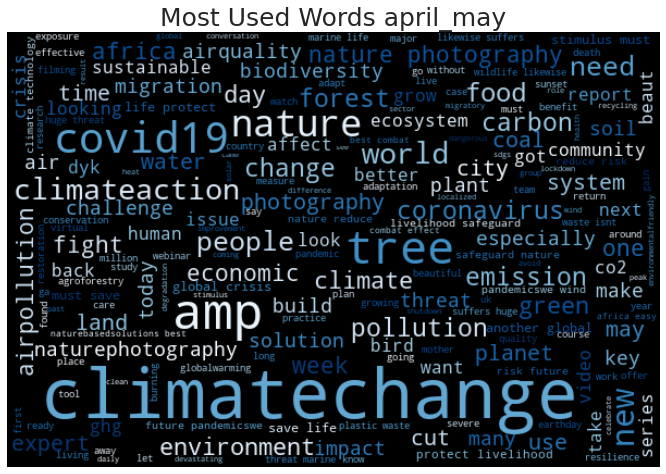

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(april_may['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words april_may',fontsize=25)

https://www.nps.gov/articles/air-quality-awareness-week.htm

Text(0.5, 1.0, 'Most popular tweeps during the april-may peak')

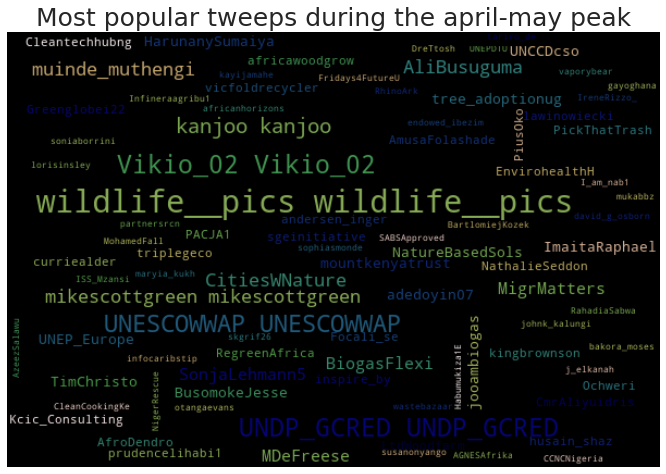

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="gist_earth_r", 
                        width=600,height=400).generate(" ".join(april_may['screen_name']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most popular tweeps during the april-may peak',fontsize=25)

#### june peak

(145, 1)
The june peak


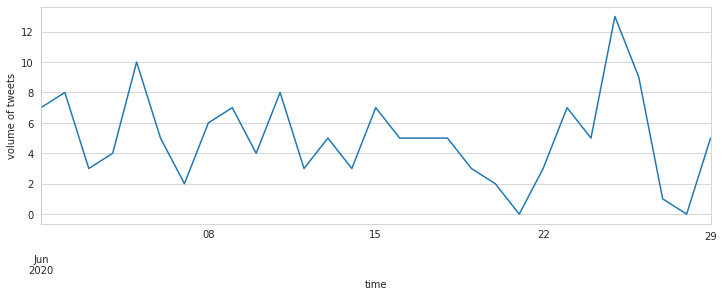

In [41]:
after_start_date = data2["time"] >= '2020-06-01'
before_end_date = data2["time"] <= '2020-06-30'

between_two_dates = after_start_date & before_end_date
june = data2.loc[between_two_dates]

june_ = june[['text', 'time']]
june_ = june_.groupby('time').agg({'text':'count'})
# trend = trend.set_index('created_at')
print(june_.shape)

# daily trend
june_daily = june_.text.resample('D').sum() 
plt.figure(figsize = (12, 4))
plt.ylabel('volume of tweets')
june_daily.plot()
print('The june peak')

Text(0.5, 1.0, 'Most Used Words june')

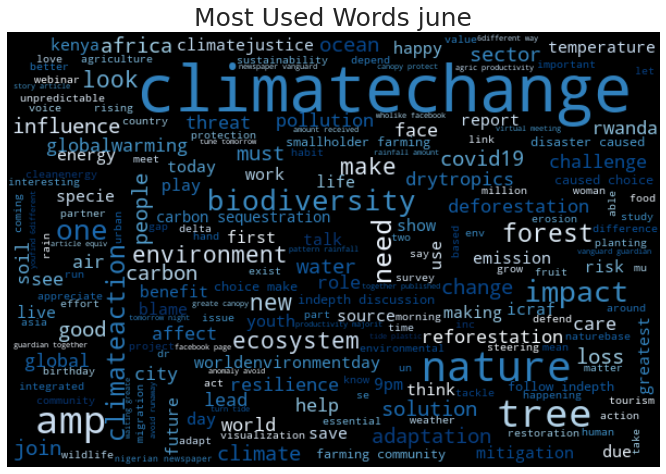

In [42]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(june['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words june',fontsize=25)

Text(0.5, 1.0, 'Most popular tweeps during the june peak')

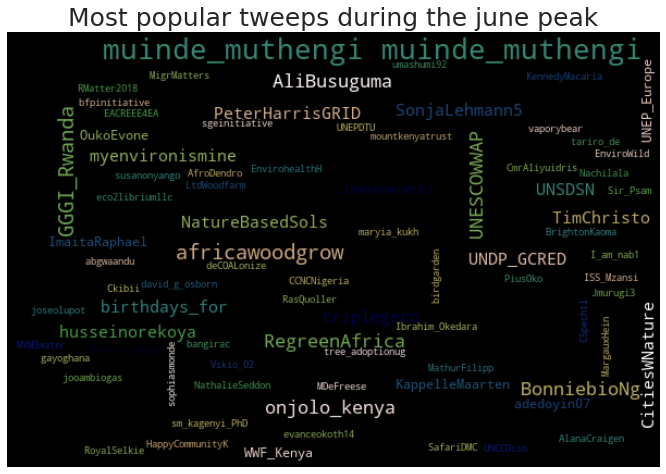

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="gist_earth_r", 
                        width=600,height=400).generate(" ".join(june['screen_name']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most popular tweeps during the june peak',fontsize=25)

#### the sept - oct peak

(2410, 1)
The sept_oct peak


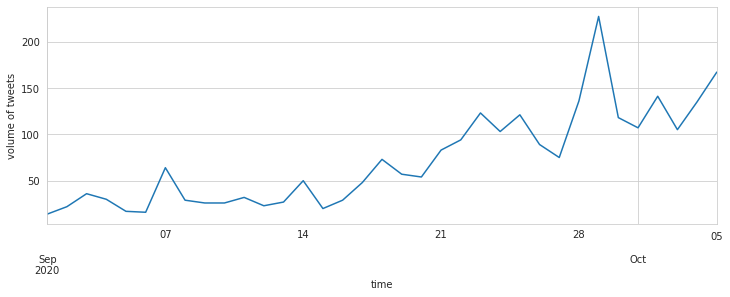

In [44]:
after_start_date = data2["time"] >= '2020-09-01'
before_end_date = data2["time"] <= '2020-10-08'

between_two_dates = after_start_date & before_end_date
sept_oct = data2.loc[between_two_dates]

sept_oct_ = sept_oct[['text', 'time']]
sept_oct_ = sept_oct_.groupby('time').agg({'text':'count'})
print(sept_oct_.shape)

# daily trend
sept_oct_daily = sept_oct_.text.resample('D').sum() 
plt.figure(figsize = (12, 4))
plt.ylabel('volume of tweets')
sept_oct_daily.plot()
print('The sept_oct peak')

Text(0.5, 1.0, 'Most Used Words sept_oct')

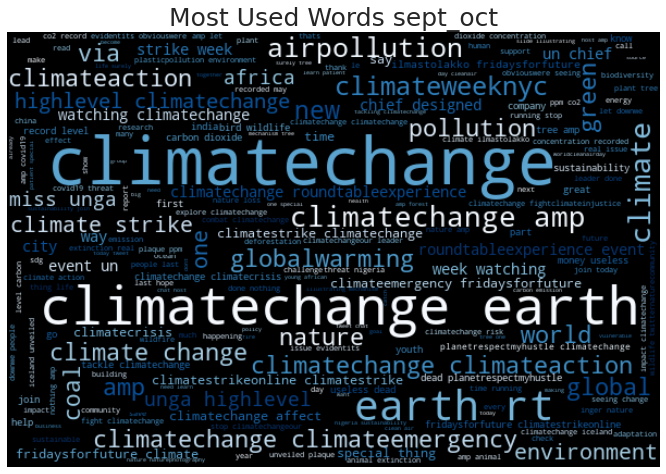

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(sept_oct['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words sept_oct',fontsize=25)

https://www.afro.who.int/regional-director/speeches-messages/international-day-clean-air-blue-skies-2020



Text(0.5, 1.0, 'Most popular tweeps during the sept_oct peak')

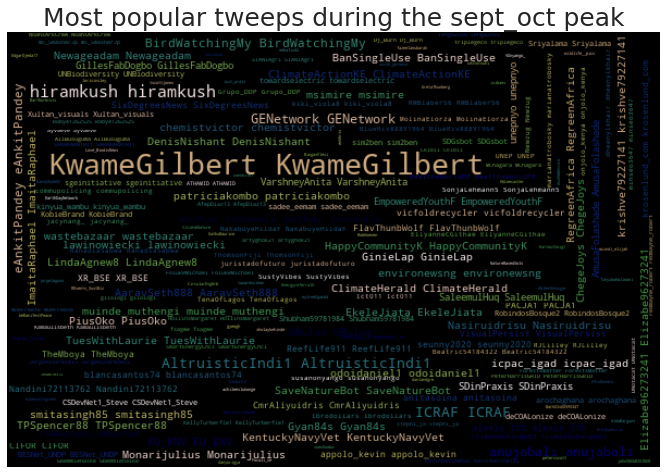

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="gist_earth_r", 
                        width=600,height=400).generate(" ".join(sept_oct['screen_name']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most popular tweeps during the sept_oct peak',fontsize=25)

In [47]:
monthly_time_data = pd.DataFrame(monthly_time_data)
monthly_time_data = monthly_time_data.assign(months = ['Dec', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']) 

Text(0.5, 1.0, 'A piechart indicating tweets count aggregated monthly')

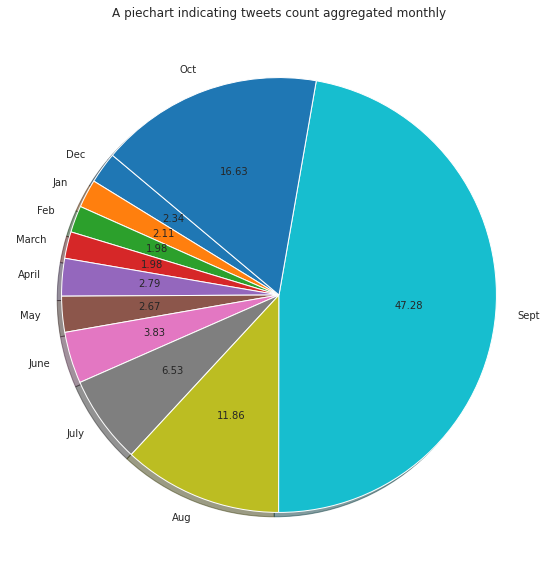

In [48]:
# number of tweets mothly aggregation using piechart

# plt.xticks(rotation= 60)
# sns.barplot(x = monthly_time_data.months, y = monthly_time_data.values, palette = 'Set2').set_title('Barplot indicating tweets counts aggregated monthly')

# explode = (0.1, 0.03, 0.03, 0.03, 0.03)  # explode 1st slice

labels = monthly_time_data.months.to_list()
sizes = monthly_time_data.text.to_list()

# Plot
plt.figure(figsize = (12, 10))
plt.pie(sizes, labels=labels, shadow=True, autopct='%.2f', startangle=140)
plt.title('A piechart indicating tweets count aggregated monthly')

#### hashtags comparison and value counts for the 3 signals + one random duration

In [49]:
from collections import Counter 
import ast

after_start_date = data2["time"] >= '2020-01-01'
before_end_date = data2["time"] <= '2020-03-31'
between_two_dates = after_start_date & before_end_date
no_signal_period = data2.loc[between_two_dates]

april = april_may['hashtag'].to_list()
june__ = june['hashtag'].to_list()
sept = sept_oct['hashtag'].to_list()
random = no_signal_period['hashtag'].to_list()

a_lists = []
for l in april:
    l_ = ast.literal_eval(l)
    a_lists.append(l_)

j_lists = []
for l in june__:
    l_ = ast.literal_eval(l)
    j_lists.append(l_)

s_lists = []
for l in sept:
    l_ = ast.literal_eval(l)
    s_lists.append(l_)

r_lists = []
for l in random:
    l_ = ast.literal_eval(l)
    r_lists.append(l_)

april_flat = [y for x in a_lists for y in x]
june_flat = [y for x in j_lists for y in x]
sept_flat = [y for x in s_lists for y in x]
random_flat = [y for x in r_lists for y in x]

a_counts = Counter(april_flat)
j_counts = Counter(june_flat)
s_counts = Counter(sept_flat)
r_counts = Counter(random_flat)

a_top = a_counts.most_common(50)
j_top = j_counts.most_common(50)
s_top = s_counts.most_common(50)
r_top = r_counts.most_common(50)

a_top_20_tags = [t[0].lower() for t in a_top]
j_top_20_tags = [t[0].lower() for t in j_top]
s_top_20_tags = [t[0].lower() for t in s_top]
r_top_20_tags = [t[0].lower() for t in r_top]

a_top_20_counts = [t[1] for t in a_top]
j_top_20_counts = [t[1] for t in j_top]
s_top_20_counts = [t[1] for t in s_top]
r_top_20_counts = [t[1] for t in r_top]

all_df = pd.DataFrame({'april_tags':a_top_20_tags, 'april_count':a_top_20_counts,
                     'june_tags':j_top_20_tags, 'june_count':j_top_20_counts,
                     'sept_tags':s_top_20_tags, 'sept_count':s_top_20_counts,
                     'random_tags':r_top_20_tags, 'random_count':r_top_20_counts})

a_df = pd.DataFrame({'april_tags':a_top_20_tags, 'april_count':a_top_20_counts})
j_df = pd.DataFrame({'june_tags':j_top_20_tags, 'june_count':j_top_20_counts})
s_df = pd.DataFrame({'sept_tags':s_top_20_tags, 'sept_count':s_top_20_counts})
r_df = pd.DataFrame({'random_tags':r_top_20_tags, 'random_count':r_top_20_counts})

all_df.head()

april_tags  april_count  ...    random_tags  random_count
0  climatechange           90  ...  climatechange           146
1         nature           40  ...          trees            16
2        covid19           20  ...  climateaction            13
3          trees           18  ...  climatechange            11
4  climatechange           13  ...      pollution            10

[5 rows x 8 columns]

In [50]:
# percentage similarity
a_j = len(set(a_top_20_tags) & set(j_top_20_tags)) / float(len(set(a_top_20_tags) | set(j_top_20_tags))) * 100
a_s = len(set(a_top_20_tags) & set(s_top_20_tags)) / float(len(set(a_top_20_tags) | set(s_top_20_tags))) * 100
a_r = len(set(a_top_20_tags) & set(j_top_20_tags)) / float(len(set(a_top_20_tags) | set(r_top_20_tags))) * 100
j_s = len(set(j_top_20_tags) & set(s_top_20_tags)) / float(len(set(j_top_20_tags) | set(s_top_20_tags))) * 100
j_r = len(set(j_top_20_tags) & set(r_top_20_tags)) / float(len(set(j_top_20_tags) | set(r_top_20_tags))) * 100
s_r = len(set(s_top_20_tags) & set(r_top_20_tags)) / float(len(set(s_top_20_tags) | set(r_top_20_tags))) * 100

print('Top hashtags similarities for the 3 signals displayed and 1 random duration with no signal: \n ')
print('April vs June signals:', round(a_j), '%')
print('April vs Sept signals:', round(a_s), '%')
print('April vs Random signals:', round(a_r), '%')
print('June vs Sept signals:', round(j_s), '%')
print('June vs Random signals:',round(j_r), '%')
print('Sept vs Random signals:', round(s_r),'%')

Top hashtags similarities for the 3 signals displayed and 1 random duration with no signal: 
 
April vs June signals: 24 %
April vs Sept signals: 34 %
April vs Random signals: 24 %
June vs Sept signals: 22 %
June vs Random signals: 25 %
Sept vs Random signals: 26 %


In [51]:
## common elements
mega = [a_top_20_tags + j_top_20_tags + s_top_20_tags + r_top_20_tags]

result = set(mega[0])
for s in mega[1:]:
    result.intersection_update(s)

# result

### Countries comparison

In [52]:
# data2.location.unique()

In [53]:
country = []
data2.location = data2.location.astype(str)
countries = data2.location.to_list()
for location in countries:
    a = location.split(',')
    b = a[-1]
    country.append(b)

myset = set(country)
# myset

In [54]:
data2['country'] = country
# data2.country.value_counts()
data2.sample(3)

Unnamed: 0  ...  country
13063      13063  ...  강원도 홍천군
441          441  ...  Afrique
69255      69255  ...   France

[3 rows x 18 columns]

In [55]:
# a

Text(0.5, 0, 'tweets')

<Figure size 576x432 with 0 Axes>

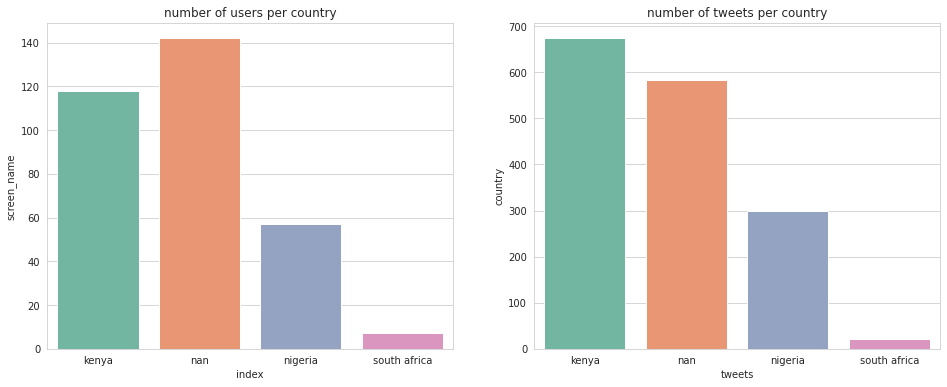

In [56]:
# country with most users tweeting about air quality
country_counts = data2[['country', 'screen_name', 'text']]
country_counts = country_counts.groupby('country').agg({'screen_name':pd.Series.nunique, 'text':'count'})
plt.figure(figsize = (8, 6))
# country_counts = country_counts.sort_values(by = ['screen_name'], ascending = False).head(4)

a = country_counts.sort_values(by = ['screen_name'], ascending = False).head(20)
n = a.index.to_list()
n = [name.lower() for name in n]
a.index = n
a = a.groupby(a.index).agg({'screen_name': 'sum', 'text':'sum'})
# a = a.loc[a.index isin ['kenya', ' kenya', 'nigeria', 'nairobi', "côte d'ivoire"]]
a = a[a.index.isin(['nan', 'kenya', ' kenya', ' nigeria', 'nairobi', " south africa"])]
a = a.reset_index()
a.loc[a['index'] == " kenya", 'index'] = "kenya"
a.loc[a['index'] == "nairobi", 'index'] = "kenya"
a.loc[a['index'] == " nigeria", 'index'] = "nigeria"
a.loc[a['index'] == " south africa", 'index'] = "south africa"
a = a.groupby(a['index']).agg({'screen_name': 'sum', 'text':'sum'})


fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))

sns.barplot(x = a.index, y = a.screen_name, ax=axis1, palette = 'Set2').set_title('number of users per country')
plt.ylabel('country')
plt.xlabel('users')
# plt.xticks(rotation = 70)


sns.barplot(x = a.index, y = a.text, ax=axis2, palette = 'Set2').set_title('number of tweets per country')
plt.ylabel('country')
plt.xlabel('tweets')
# plt.xticks(rotation = 70)

# n = country_counts.index.to_list()
# n = [name.lower() for name in n]
# v = country_counts.screen_name.to_list()

# dict_ = {}
# for name, value in zip(n, v):
#     dict_.update( {name : value} )
# dict_

#### country wise time series

In [57]:
data2.columns

Index(['Unnamed: 0', 'id', 'time', 'screen_name', 'desc', 'friends',
       'no_tweets', 'followers', 'location', 'text', 'favourite_count',
       'created_at', 'verified', 'retweet_count', 'entities', 'lang',
       'hashtag', 'country'],
      dtype='object')

In [58]:
d = data2[['country', 'screen_name', 'time', 'text']]
n = d.country.to_list()
n = [name.lower() for name in n]
d.country = n

d = d[d.country.isin(['nan', 'kenya', ' kenya', ' nigeria', 'nairobi', " south africa"])]
d.loc[d['country'] == " kenya", 'country'] = "kenya"
d.loc[d['country'] == "nairobi", 'country'] = "kenya"
d.loc[d['country'] == " nigeria", 'country'] = "nigeria"
d.loc[d['country'] == " south africa", 'country'] = "south africa"

print(d.shape)
d.head()

(1642, 4)


country  ...                                               text
0  south africa  ...  wow go long way towards blueskychallenge effec...
1  south africa  ...  join blueskychallenge join dsg turnitaround gl...
2  south africa  ...  tgim planning apply blueskychallenge week dont...
3  south africa  ...  check blueskychallenge amp share let mobilise ...
4  south africa  ...  happy worldcleanairdaywe proud present firstev...

[5 rows x 4 columns]

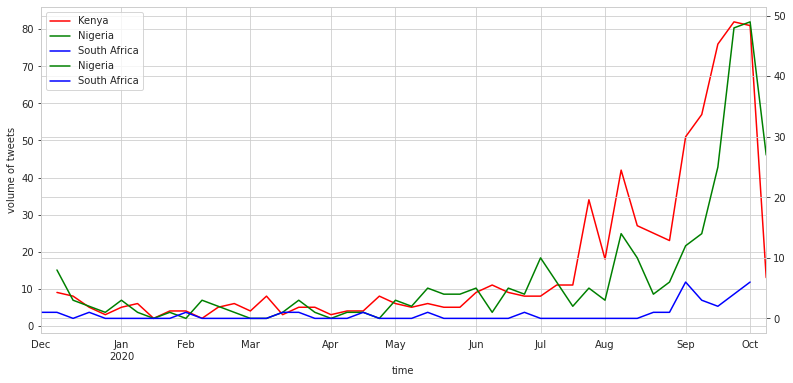

In [59]:
kenya = d[d.country == 'kenya']
nigeria = d[d.country == 'nigeria']
sa = d[d.country == 'south africa']



##trend of number of tweets
kenya_trend = kenya[['text', 'time']]
kenya_trend = kenya_trend.groupby('time').agg({'text':'count'})

n_trend = nigeria[['text', 'time']]
n_trend = n_trend.groupby('time').agg({'text':'count'})

sa_trend = sa[['text', 'time']]
sa_trend = sa_trend.groupby('time').agg({'text':'count'})


# daily trend
daily_time_data_k = kenya_trend.text.resample('W').sum() 
daily_time_data_n = n_trend.text.resample('W').sum() 
daily_time_data_sa = sa_trend.text.resample('W').sum() 

plt.figure(figsize=(13,6))
plt.ylabel('volume of tweets')

ax1 = daily_time_data_k.plot(color='Red', grid=True, label='Kenya')
ax2 = daily_time_data_n.plot(color='Green', grid=True, secondary_y=True, label='Nigeria')
ax3 = daily_time_data_sa.plot(color='Blue', grid=True, secondary_y=True, label='South Africa')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.legend(h1+h2+h3, l1+l2+l3, loc=2)

Text(0.5, 1.0, 'Most Used Words: Kenya')

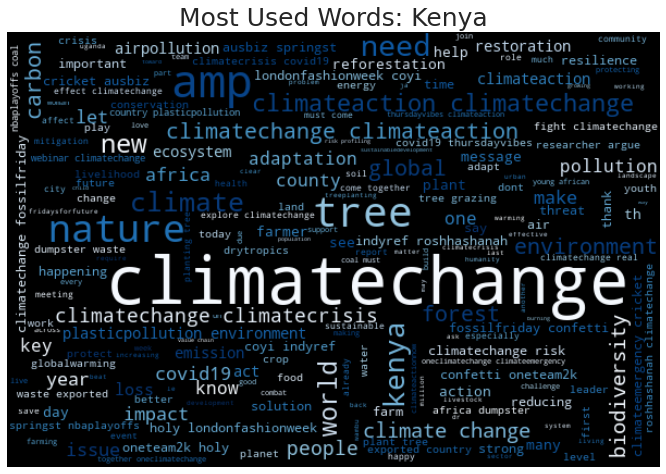

In [60]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(kenya['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words: Kenya',fontsize=25)

Text(0.5, 1.0, 'Most Used Words: Nigeria')

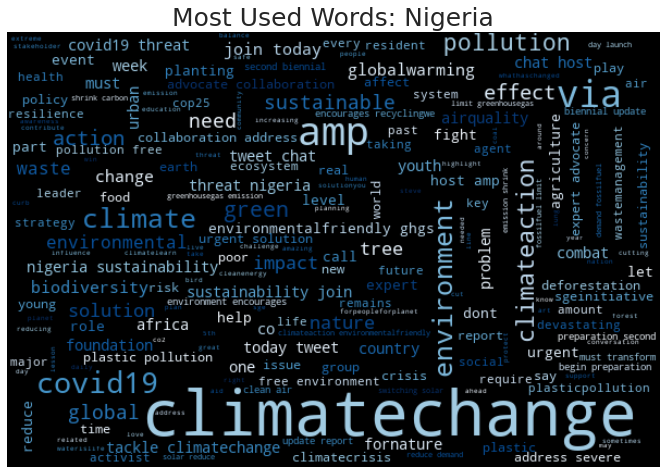

In [61]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(nigeria['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words: Nigeria',fontsize=25)

Text(0.5, 1.0, 'Most Used Words : SA')

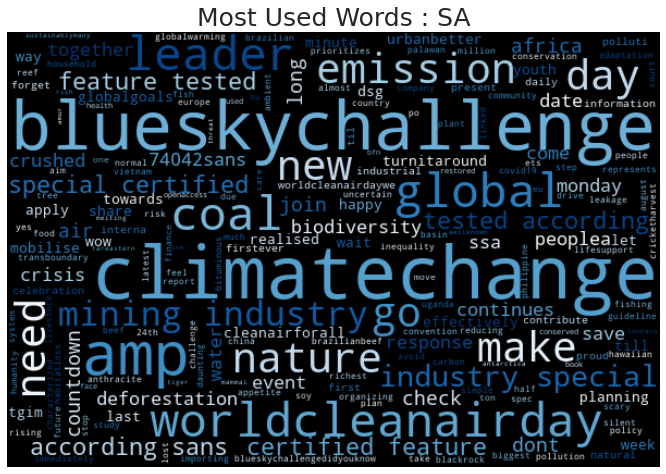

In [62]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(sa['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words : SA',fontsize=25)

### Users

(3829, 1)
Number of users timeseries plot averaged weekly 


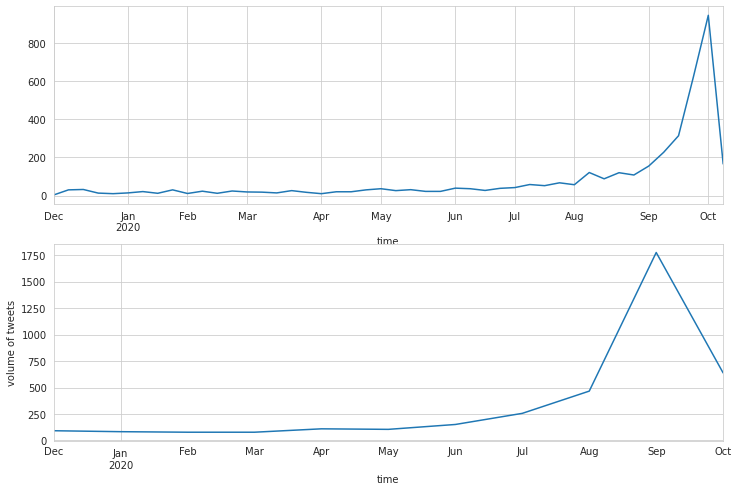

In [63]:
##trend of number of users

trend1 = data2[['screen_name', 'time']]
# trend.time = pd.to_datetime(trend.time)
trend1 = trend1.groupby('time').agg({'screen_name':pd.Series.nunique})
print(trend1.shape)

# weekly trend
weekly_time_data = trend1.screen_name.resample('W').sum() 
# monthly trend
mothly_time_data = trend1.screen_name.resample('M').sum() 

f, axs = plt.subplots(2,figsize=(12,8))
plt.ylabel('volume of tweets')
weekly_time_data.plot(ax = axs[0])
mothly_time_data.plot(ax=axs[1])
print('Number of users timeseries plot averaged weekly ')

In [64]:
# users popularity
users = data2[['screen_name', 'verified', 'desc', 'friends', 'no_tweets', 'followers', 'favourite_count', 'created_at']]

Text(0.5, 1.0, 'countplot showing number of verified users vs the unverified ones')

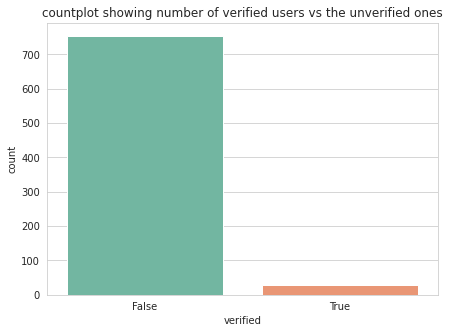

In [65]:
# verified or not
plt.figure(figsize = (7,5))
ver = users.groupby('screen_name').agg({'verified':pd.Series.mode})
sns.countplot(ver.verified, palette = 'Set2').set_title('countplot showing number of verified users vs the unverified ones')

Tweets volume timeseries plots averaged daily, weekly and monthly for the verified and unverified users


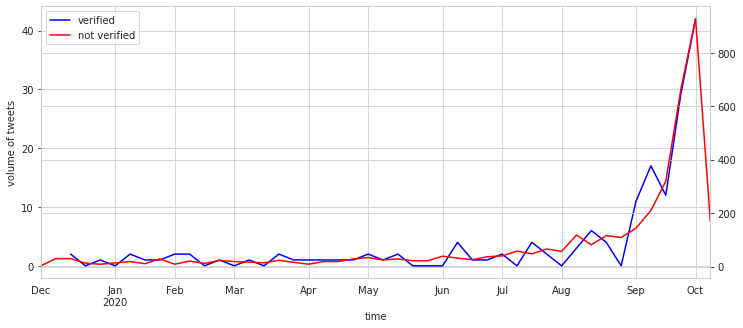

In [66]:
c = data2[['text', 'screen_name', 'verified', 'time']]
v = c[c.verified == True]
nv = c[c.verified == False]

##trend of number of tweets
v_trend = v[['text', 'time']]
v_trend = v_trend.groupby('time').agg({'text':'count'})

nv_trend = nv[['text', 'time']]
nv_trend = nv_trend.groupby('time').agg({'text':'count'})


# daily trend
daily_v_trend= v_trend.text.resample('W').sum() 
daily_nv_trend = nv_trend.text.resample('W').sum() 

plt.figure(figsize=(12,5))
plt.ylabel('volume of tweets')

ax1 = daily_v_trend.plot(color='blue', grid=True, label='verified')
ax2 = daily_nv_trend.plot(color='red', grid=True, secondary_y=True, label='not verified')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)

print('Tweets volume timeseries plots averaged daily, weekly and monthly for the verified and unverified users')

Text(0.5, 1.0, 'Most Used Words : verified users')

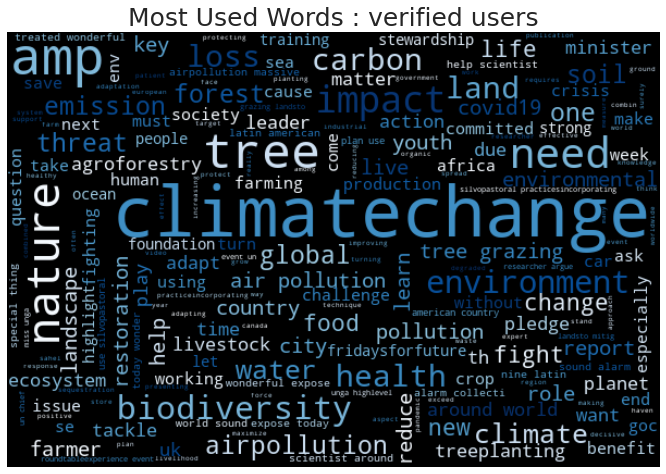

In [67]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(v['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words : verified users',fontsize=25)

Text(0.5, 1.0, 'Most Used Words : non-verified users')

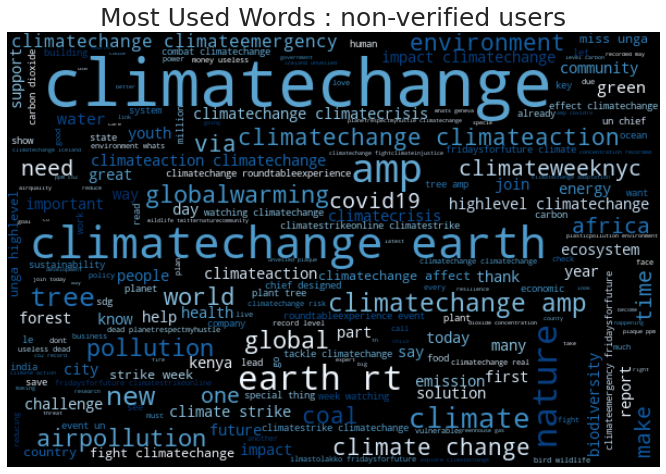

In [68]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(nv['text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words : non-verified users',fontsize=25)

#### account age decile classes tweets proportions

In [69]:
import datetime
data2['created_at'] = pd.to_datetime(data2['created_at'])
data2['account_age'] = datetime.datetime.now() - data2['created_at']
data2['age_decile'] = pd.qcut(data2['account_age'], 5, labels = [' very young', 'fairly young', 'medium aged', 'fairly old', 'very old']) 

deciles_df = data2[['age_decile', 'text', 'screen_name']]
deciles_df = deciles_df.groupby('age_decile').agg({'text':'count', 'screen_name':pd.Series.nunique})
deciles_df

text  screen_name
age_decile                     
 very young    791          176
fairly young   784          155
medium aged    789          185
fairly old     801           85
very old       773          182

Text(0.5, 0, 'Account Age Groups')

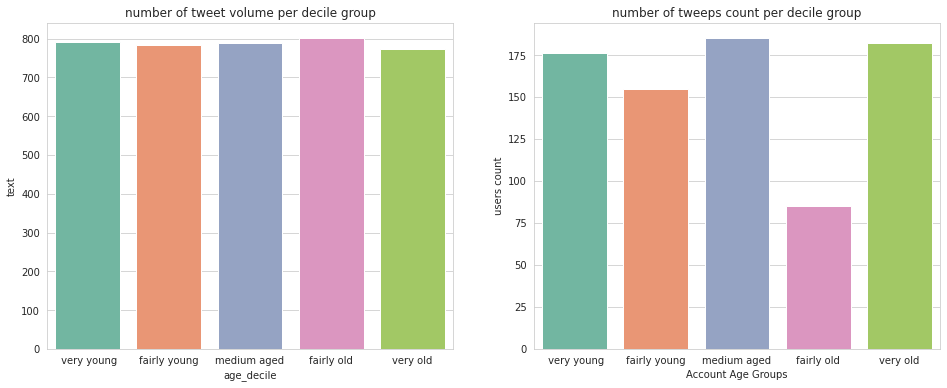

In [70]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))

sns.barplot(x = deciles_df.index, y = deciles_df.text, ax=axis1, palette = 'Set2').set_title('number of tweet volume per decile group')
plt.ylabel('tweets volume')
plt.xlabel('Account Age Groups')


sns.barplot(x = deciles_df.index, y = deciles_df.screen_name, ax=axis2, palette = 'Set2').set_title('number of tweeps count per decile group')
plt.ylabel('users count')
plt.xlabel('Account Age Groups')

tweets volume - evenly distributed accross the age groups.

age groups - no specific trend to this.

#### Users description cloud

In [71]:
data2['desc'] = data2['desc'].astype(str)

Text(0.5, 1.0, 'Most common user description words : with retweets')

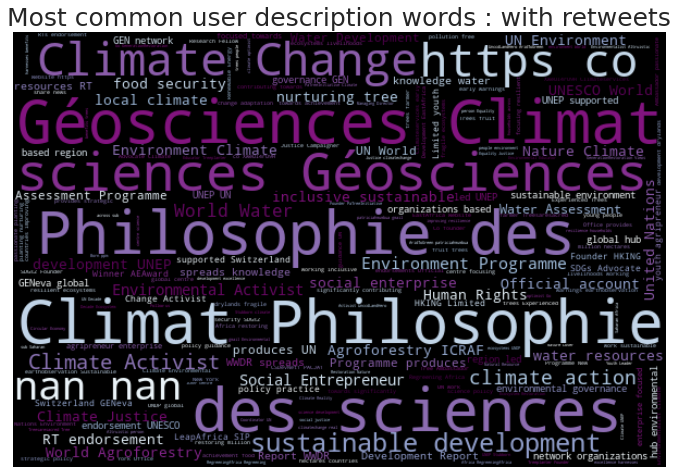

In [72]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="BuPu", 
                        width=600,height=400).generate(" ".join(data2['desc']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most common user description words : with retweets',fontsize=25)

Text(0.5, 1.0, 'Most common user description words : no retweets')

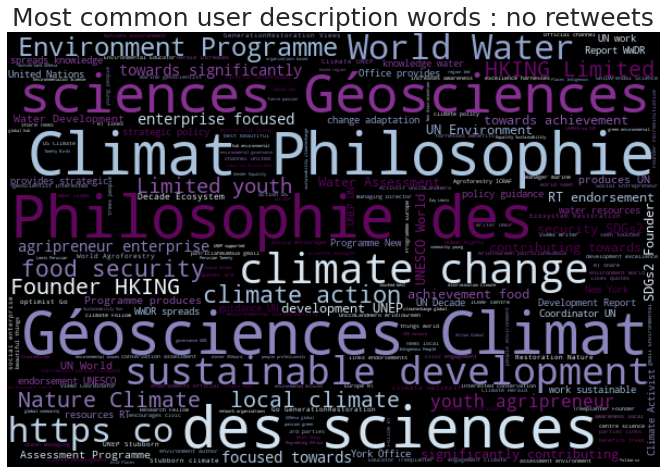

In [73]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
data4['desc'] = data4['desc'].astype(str)
fig, (ax2) = plt.subplots(1,1,figsize=[15, 8])
wordcloud2 = WordCloud(background_color='black',colormap="BuPu", 
                        width=600,height=400).generate(" ".join(data4['desc']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most common user description words : no retweets',fontsize=25)

In [74]:
# # n-grams
# def ngram_df(corpus,nrange,n=None):
#     vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     total_list=words_freq[:n]
#     df=pd.DataFrame(total_list,columns=['text','count'])
#     return df

# unigram_df1 = ngram_df(data3['desc'],(1,1),20)
# bigram_df1= ngram_df(data3['desc'],(2,2),20)
# trigram_df1 = ngram_df(data3['desc'],(3,3),20)


# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# import plotly.express as px

# fig = make_subplots(
#     rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
#     specs=[[{"type": "scatter"}],
#            [{"type": "scatter"}],
#            [{"type": "scatter"}]
#           ])
# fig.add_trace(go.Bar(
#     y=unigram_df1['text'][::-1],
#     x=unigram_df1['count'][::-1],
#     marker={'color': "blue"},
#     text=unigram_df1['count'],
#     textposition = "outside",
#     orientation="h",
#     name="Months",
# ),row=1,col=1)
# fig.add_trace(go.Bar(
#     y=bigram_df1['text'][::-1],
#     x=bigram_df1['count'][::-1],
#     marker={'color': "blue"},
#     text=bigram_df1['count'],
#      name="Days",
#     textposition = "outside",
#     orientation="h",
# ),row=2,col=1)
# fig.add_trace(go.Bar(
#     y=trigram_df1['text'][::-1],
#     x=trigram_df1['count'][::-1],
#     marker={'color': "blue"},
#     text=trigram_df1['count'],
#      name="Days",
#     orientation="h",
#     textposition = "outside",
# ),row=3,col=1)
# fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
#                   showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
# fig.show()

### hashtags

In [75]:
data2.hashtag.head(10)

0                  ['blueskychallenge', 'urbanbetter']
1    ['Blueskychallenge', 'TurnItAround', 'GlobalGo...
2                         ['TGIM', 'blueskychallenge']
3               ['blueskychallenge', 'CleanAirForAll']
4             ['WorldCleanAirDay', 'BlueSkyChallenge']
5             ['BlueSkyChallenge', 'WorldCleanAirDay']
6             ['blueskychallenge', 'WorldCleanAirDay']
7             ['blueskychallenge', 'WorldCleanAirDay']
8                                 ['BlueSkyChallenge']
9    ['WorldCleanAirDay', 'BlueSkyChallenge', 'DidY...
Name: hashtag, dtype: object

In [76]:
''' make a big list of all the individuals top 5 hashtags, pick the top 10 out of the big list,
group the individuals based on their similarities in relation to those hashtags'''
from collections import Counter 
import ast

my_list = data2['hashtag'].to_list()

lists = []
for l in my_list:
    l_ = ast.literal_eval(l)
    lists.append(l_)


flattened = [y for x in lists for y in x]
counts = Counter(flattened)
top = counts.most_common(50)
top_10_tags = [t[0] for t in top]
# top_10_tags

In [77]:
# def removeDuplicates(lst):  
#     return [t for t in (set(tuple(i) for i in lst))] 
          
# top = removeDuplicates(top)
df = pd.DataFrame(top, columns =['hashtag', 'count']) 
df = df.sort_values(by = ['count'], ascending = False)
# df['hashtag'] = [i.lower() for i in df.hashtag.to_list()]
# df = df.drop_duplicates(subset = 'hashtag')
# df.head(20)

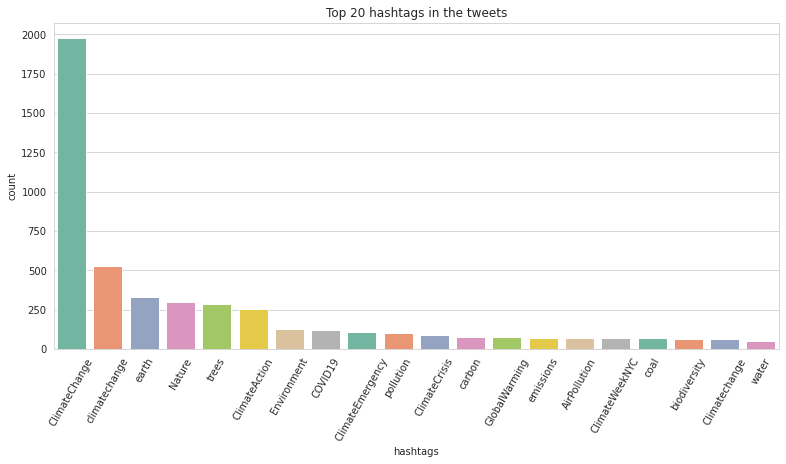

In [78]:
# top twenty hashtags overall
x = [t[0] for t in top]
y = [t[1] for t in top]
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(x = df['hashtag'].head(20), y = df['count'].head(20), palette = 'Set2', ax = ax)
plt.title('Top 20 hashtags in the tweets')
plt.xticks(rotation=60)
plt.xlabel('hashtags')
plt.ylabel('count')
sns.set_style('whitegrid')

## 

### tweets: ngrams

In [79]:
data2.text.head()

0    wow go long way towards blueskychallenge effec...
1    join blueskychallenge join dsg turnitaround gl...
2    tgim planning apply blueskychallenge week dont...
3    check blueskychallenge amp share let mobilise ...
4    happy worldcleanairdaywe proud present firstev...
Name: text, dtype: object

In [80]:
# preprocessing 
import re 

# remove the hashtags, mentions and unwanted characters from the tweet texts
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

data3 = clean_text(data2, 'text')
data3.text.head()

0    wow go long way towards blueskychallenge effec...
1    join blueskychallenge join dsg turnitaround gl...
2    tgim planning apply blueskychallenge week dont...
3    check blueskychallenge amp share let mobilise ...
4    happy worldcleanairdaywe proud present firstev...
Name: text, dtype: object

In [81]:
# lemmatization, stopwords and tokenization

import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')

nlp = spacy.load("en_core_web_sm")
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
data3.text = data3.text.apply(furnished)
data3.text.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    wow go long way towards blueskychallenge effec...
1    join blueskychallenge join dsg turnitaround gl...
2    tgim planning apply blueskychallenge week dont...
3    check blueskychallenge amp share let mobilise ...
4    happy worldcleanairdaywe proud present firstev...
Name: text, dtype: object

In [82]:
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df

unigram_df1 = ngram_df(data3['text'],(1,1),20)
bigram_df1= ngram_df(data3['text'],(2,2),20)
trigram_df1 = ngram_df(data3['text'],(3,3),20)

In [83]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [84]:
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])
fig.add_trace(go.Bar(
    y=unigram_df1['text'][::-1],
    x=unigram_df1['count'][::-1],
    marker={'color': "blue"},
    text=unigram_df1['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)
fig.add_trace(go.Bar(
    y=bigram_df1['text'][::-1],
    x=bigram_df1['count'][::-1],
    marker={'color': "blue"},
    text=bigram_df1['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)
fig.add_trace(go.Bar(
    y=trigram_df1['text'][::-1],
    x=trigram_df1['count'][::-1],
    marker={'color': "blue"},
    text=trigram_df1['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

### retweets + likes + users in general

In [85]:
data2.dtypes

Unnamed: 0                  object
id                           int64
time                datetime64[ns]
screen_name                 object
desc                        object
friends                     object
no_tweets                   object
followers                   object
location                    object
text                        object
favourite_count            float64
created_at          datetime64[ns]
verified                    object
retweet_count              float64
entities                    object
lang                        object
hashtag                     object
country                     object
account_age        timedelta64[ns]
age_decile                category
dtype: object

In [86]:
##trend of number of tweets
trend3 = data2[['retweet_count', 'time', 'favourite_count']]
# trend.created_at = pd.to_datetime(trend.created_at)
trend3 = trend3.groupby('time').agg({'favourite_count':'sum', 'retweet_count':'sum'})
trend3['total_score'] = trend3['retweet_count'] + trend3['favourite_count']
print(trend3.shape)
trend3.head(3)

(3829, 3)


favourite_count  retweet_count  total_score
time                                                            
2019-12-01 04:21:18              0.0           26.0         26.0
2019-12-01 06:25:34              0.0           41.0         41.0
2019-12-01 14:17:30              0.0          615.0        615.0

<Figure size 720x360 with 0 Axes>

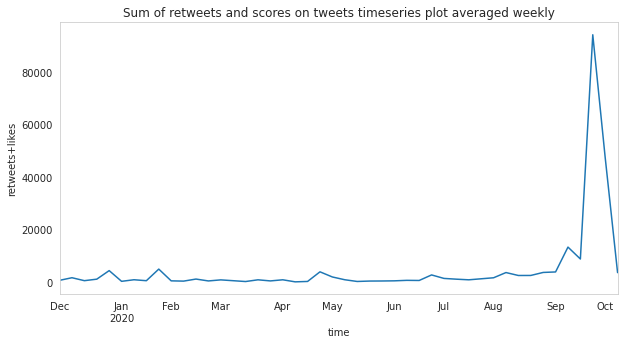

In [87]:
# weekly trend
weekly_time_data = trend3.total_score.resample('W').sum() 
plt.figure(figsize = (10,5))
plt.figure(figsize = (10,5))
plt.title('Sum of retweets and scores on tweets timeseries plot averaged weekly')
plt.ylabel('retweets+likes')
weekly_time_data.plot()
plt.grid()

### top users

In [88]:
# description
# tweets volume in relation to tweet cout
data2.no_tweets = data2.no_tweets.astype('int')
data2.dtypes

Unnamed: 0                  object
id                           int64
time                datetime64[ns]
screen_name                 object
desc                        object
friends                     object
no_tweets                    int64
followers                   object
location                    object
text                        object
favourite_count            float64
created_at          datetime64[ns]
verified                    object
retweet_count              float64
entities                    object
lang                        object
hashtag                     object
country                     object
account_age        timedelta64[ns]
age_decile                category
dtype: object

In [89]:
# lets if the top tweeps (based on number of tweets) are organisations or individuals
u = data2[['screen_name', 'text', 'no_tweets']]
u = u.groupby('screen_name').agg({'text':'count', 'no_tweets':'mean'})
u = u.sort_values(by = ['text'], ascending = False)
top_20_tweeps = u.head(20)
top_20_tweeps

text  no_tweets
screen_name                     
KwameGilbert      322    33491.0
muinde_muthengi    39      624.0
UNESCOWWAP         39     2730.0
GENetwork          36    14102.0
hiramkush          33     1497.0
unepnyo            32     2772.0
icpac_igad         30     3553.0
UNDP_GCRED         27     4745.0
ImaitaRaphael      27     1220.0
RegreenAfrica      26      978.0
ICRAF              25    19561.0
AltruisticIndi1    24      259.0
patriciakombo      24     3547.0
TimChristo         23     4309.0
ClimateHerald      22      309.0
kinyua_wambu       22      393.0
lawinowiecki       22      692.0
SonjaLehmann5      21    20169.0
PiusOko            21     1204.0
anujabali          21     2176.0

In [90]:
# fraction of tweets in relation to their total number of tweets
top_20_tweeps['proportion'] = (top_20_tweeps['text'] / top_20_tweeps['no_tweets']) * 100


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

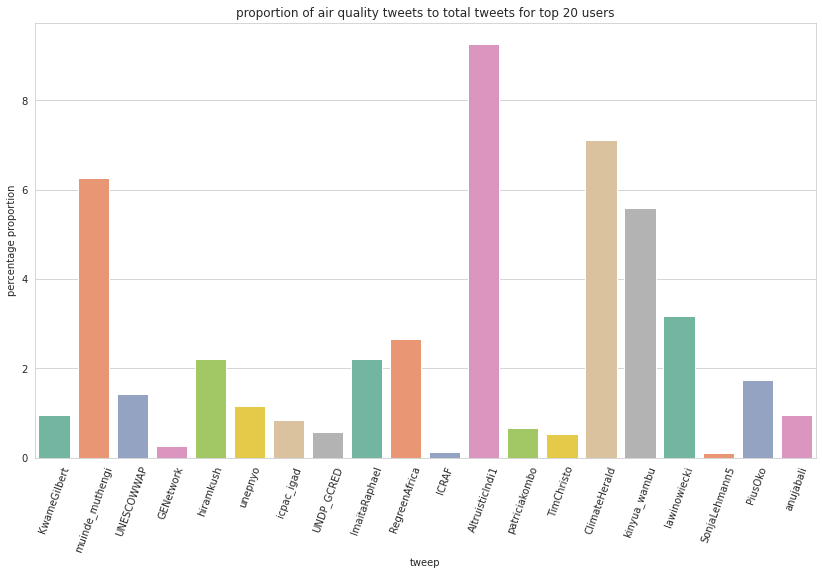

In [91]:
# their descriptions (are they organisations or individuals)
plt.figure(figsize = (14, 8))
sns.barplot(x = top_20_tweeps.index, y = top_20_tweeps['proportion'], palette = 'Set2').set_title('proportion of air quality tweets to total tweets for top 20 users')
plt.ylabel('percentage proportion')
plt.xlabel('tweep')
plt.xticks(rotation = 70)

Text(0.5, 1.0, 'overall tweeps word cloud')

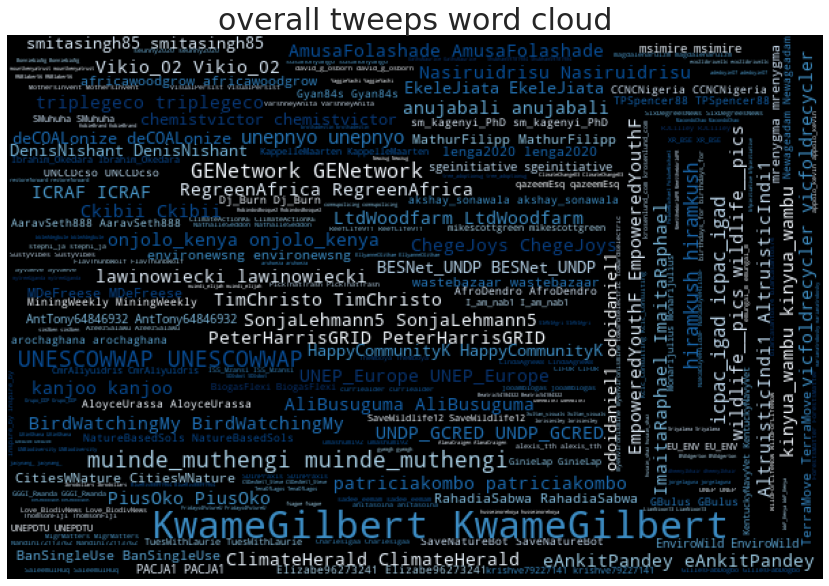

In [92]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[25, 10])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(data2['screen_name']))

ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('overall tweeps word cloud',fontsize=30)

##### contextual analysis: the 3 durations//
##### more text analysis
##### plot tfidf
##### look deeply into the points with interesting signals. (before, during and after)
#####  kmeans thingy
##### we can delete the climate change hashtagged tweets



### LDA

> LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

> We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

> * psi, the distribution of words for each topic K

> * phi, the distribution of topics for each document i

In [93]:
data2.text.head()

0    wow go long way towards blueskychallenge effec...
1    join blueskychallenge join dsg turnitaround gl...
2    tgim planning apply blueskychallenge week dont...
3    check blueskychallenge amp share let mobilise ...
4    happy worldcleanairdaywe proud present firstev...
Name: text, dtype: object

#### pre

##### Vector representation: BOW
then check if the top words are same as our top words in the word clouds.

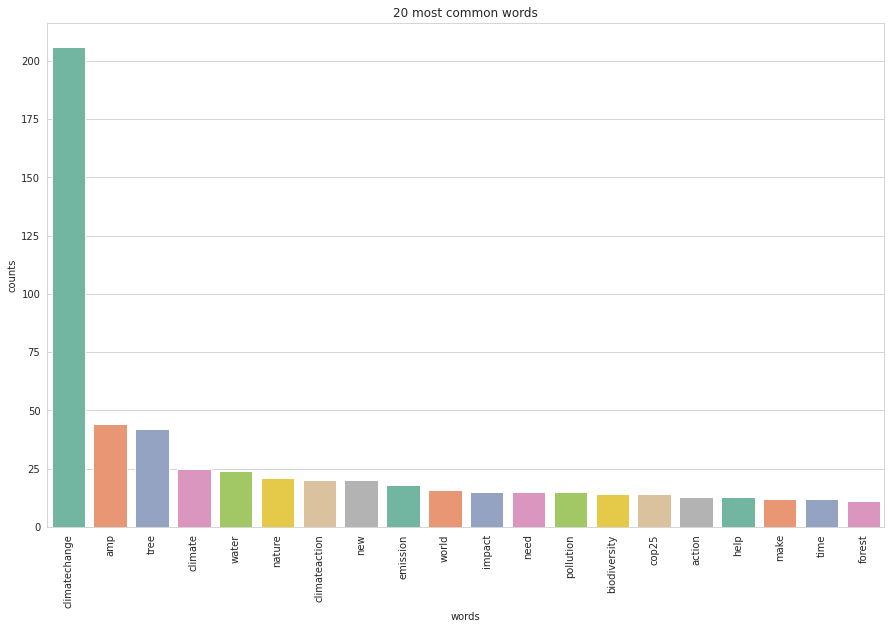

In [94]:
def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette = 'Set2',)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words

count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(pre['text'])# Visualise the 10 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [95]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state = 42)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA: pre")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA: pre

Topic #0:
tree climatechange climateaction amp new plant biodiversity air pollution use environmental airquality waste earth lung

Topic #1:
climatechange amp climate impact nature world forest need day time path climateaction biodiversity action water

Topic #2:
climatechange nature food agent help emission carbon new le amp cool soil pollution climateaction expert

Topic #3:
climatechange climate real help amp make cop25 temperature terrain driving aberdare eroded rugged range occasioned

Topic #4:
climatechange water amp fruit tree climate development sustainable new change africa world report need emission


In [96]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=0e58d46dfb747d0df000a6ce33c8fac14a4643ec30f810969f8bca856923fbbc
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

    > For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

    > For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [97]:
# # visualizing the topics for interpretability

%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

LDAvis_data_filepath = '/content/'+str(number_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


CPU times: user 327 ms, sys: 32.4 ms, total: 359 ms
Wall time: 1.54 s


In [98]:
print('pre lockdown lda plot')
pyLDAvis.display(LDAvis_prepared)

pre lockdown lda plot


#### during

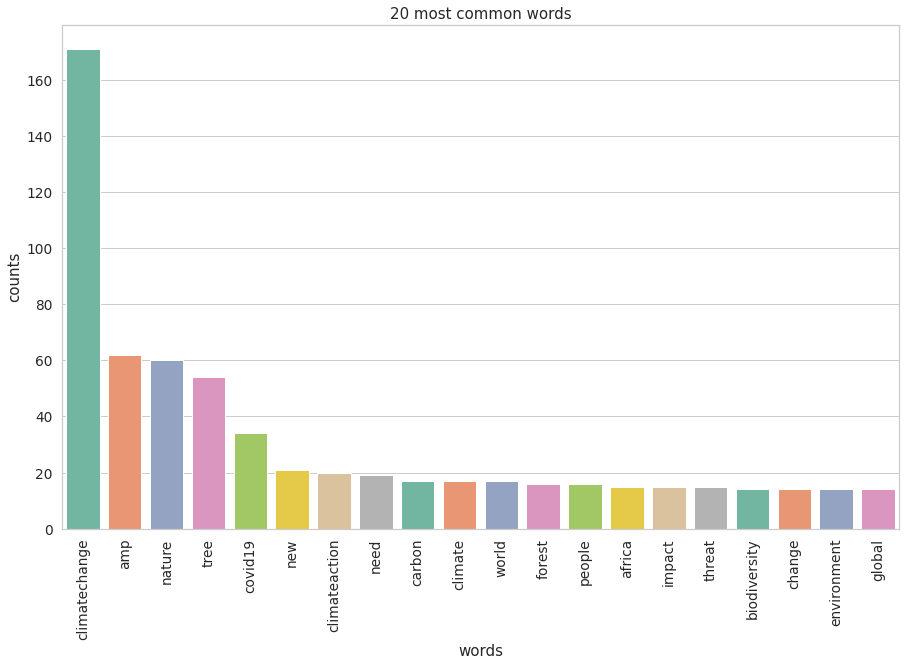

In [99]:
def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette = 'Set2',)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words

count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(during['text'])# Visualise the 10 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [100]:
# Tweak the two parameters below
number_topics = 5
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state = 42)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:during")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:during

Topic #0:
climatechange amp nature carbon food covid19 tree climateaction impact forest new like biodiversity world airquality

Topic #1:
climatechange nature covid19 life new amp risk climateaction look threat affect coronavirus protect future global

Topic #2:
climatechange tree amp change nature covid19 world ecosystem video week land solution soil looking key

Topic #3:
climatechange nature amp adaptation water climate world photography care country technology environment emission air virtual

Topic #4:
climatechange tree need africa make amp people today fight threat pollution city covid19 challenge global


In [101]:
# # visualizing the topics for interpretability

%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

LDAvis_data_filepath = '/content/'+str(number_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

CPU times: user 234 ms, sys: 1.31 ms, total: 236 ms
Wall time: 663 ms


In [102]:
print('during lockdown lda plot')
pyLDAvis.display(LDAvis_prepared)

during lockdown lda plot


#### post

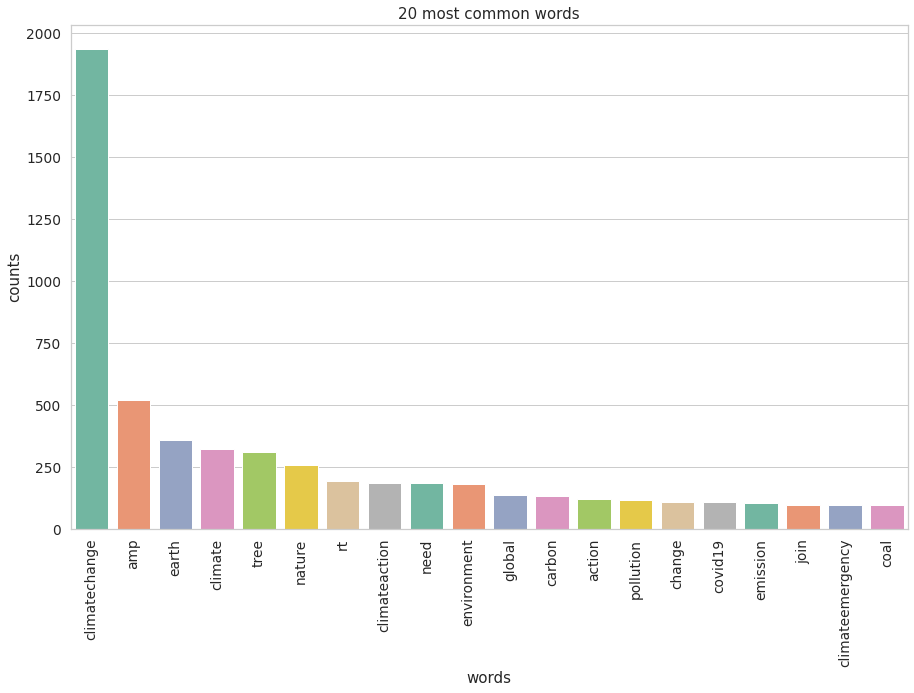

In [103]:
def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette = 'Set2',)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words

count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(post['text'])# Visualise the 10 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [104]:
# Tweak the two parameters below
number_topics = 5
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state = 42)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:post")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:post

Topic #0:
climatechange earth climate rt amp nature action climatecrisis change climateaction need let time loss foundation

Topic #1:
tree amp climatechange nature need water carbon forest strong biodiversity emission pollution waste restoration plant

Topic #2:
climatechange amp earth environment rt climateaction join climateweeknyc thing nature real sustainability covid19 climate global

Topic #3:
climatechange carbon impact amp level nature environment global day pollution co2 money world airpollution demand

Topic #4:
climatechange climateemergency climate fridaysforfuture coal week climatestrike miss unga highlevel chief event strike roundtableexperience climatestrikeonline


In [105]:
# # visualizing the topics for interpretability

%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

LDAvis_data_filepath = '/content/'+str(number_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

CPU times: user 491 ms, sys: 10.7 ms, total: 502 ms
Wall time: 1.4 s


In [106]:
print('post lockdown lda plot')
pyLDAvis.display(LDAvis_prepared)

post lockdown lda plot


> The left panel, labeled **Intertopic Distance Map**: circles represent different topics and the distance between them. Similar topics appear closer and the dissimilar topics farther. The relative size of a topic's circle in the plot corresponds to the relative frequency of the topic in the corpus. An individual topic may be selected for closer scrutiny by clicking on its circle, or entering its number in the "selected topic" box in the upper-left.

> The right panel, include the **bar chart of the top 30 terms**. When no topic is selected in the plot on the left, the bar chart shows the top-30 most "salient" terms in the corpus. A term's saliency is a measure of both how frequent the term is in the corpus and how "distinctive" it is in distinguishing between different topics. Selecting each topic on the right, modifies the bar chart to show the "relevant" terms for the selected topic. Relevence is defined as in footer 2 and can be tuned by parameter λ
, smaller λ gives higher weight to the term's distinctiveness while larger λs corresponds to probablity of the term occurance per topics.
Therefore, to get a better sense of terms per topic we'll use λ = 0

In [107]:
# docs


> divide each document in two parts and see if the topics assign to them are simialr. => the more similar the better

> compare randomly chosen docs with each other. => the less similar the better


In [108]:
# # evaluating our model

# from sklearn.metrics.pairwise import cosine_similarity
# from gensim.corpora import Dictionary
# # Create a dictionary representation of the documents.
# docs = np.array(data2['text'])
# dictionary = Dictionary([d.split() for d in docs])

# # split
# data2['text_b'] = docs
# docs1 = data2['text_b'].apply(lambda l: l[:int(len(l)/2)])
# docs2 = data2['text_b'].apply(lambda l: l[int(len(l)/2):])

# # transform
# corpus1 = [dictionary.doc2bow(doc) for doc in docs1]
# corpus2 = [dictionary.doc2bow(doc) for doc in docs2]

# # Using the corpus LDA model tranformation
# lda_corpus1 = lda[corpus1]
# lda_corpus2 = lda[corpus2]


# from collections import OrderedDict
# def get_doc_topic_dist(model, corpus, kwords=False):
    
#     '''
#     LDA transformation, for each doc only returns topics with non-zero weight
#     This function makes a matrix transformation of docs in the topic space.
#     '''
#     top_dist =[]
#     keys = []

#     for d in corpus:
#         tmp = {i:0 for i in range(num_topics)}
#         tmp.update(dict(model[d]))
#         vals = list(OrderedDict(tmp).values())
#         top_dist += [array(vals)]
#         if kwords:
#             keys += [array(vals).argmax()]

#     return array(top_dist), keys


# top_dist1, _ = get_doc_topic_dist(model, lda_corpus1)
# top_dist2, _ = get_doc_topic_dist(model, lda_corpus2)

# print("Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):")
# print(mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1,c2 in zip(top_dist1, top_dist2)]))

# random_pairs = np.random.randint(0, len(p_df['PaperText']), size=(400, 2))

# print("Inter similarity: cosine similarity between random parts (lower is better):")
# print(np.mean([cosine_similarity(top_dist1[i[0]].reshape(1, -1), top_dist2[i[1]].reshape(1, -1)) for i in random_pairs]))

### External  Data
we wanna compare and check for any interesting relations. 

In [109]:
ext = pd.read_csv('/content/drive/My Drive/files_batches/Air quality data/Copy of Air_Quality_updated.csv')
print(ext.shape)
ext.head()

(37940, 11)


Unnamed: 0        Date ISO Code   Country  ...   min   max  median  variance
0      176726  2020-03-14       ET  Ethiopia  ...  34.0  59.0    49.0    639.07
1      176727  2020-03-25       ET  Ethiopia  ...  52.0  82.0    60.0   1257.12
2      176728  2020-04-13       ET  Ethiopia  ...  53.1  73.8    65.3    473.46
3      176729  2020-05-06       ET  Ethiopia  ...  41.0  87.0    56.0   2222.88
4      176730  2020-08-21       ET  Ethiopia  ...  60.0  93.0    77.0    845.28

[5 rows x 11 columns]